In [2]:
# Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Data Operations
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings("ignore")


### Importing libraries

### Import data

In [4]:
df = pd.read_csv("./data/train.csv")

### Data Understanding

In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
203,204,0,3,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.225,NaN,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.750,NaN,Q
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.900,NaN,S
237,238,1,2,"Collyer, Miss. Marjorie ""Lottie""",female,8.0,0,2,C.A. 31921,26.250,NaN,S
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.500,T,S


### Data Wrangling

#### Missing Values

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### Median imputation for Age

In [12]:
df["Age"].fillna(df["Age"].median(), inplace=True)

#### Outlier Detection and Removal

##### Plots before removing outliers

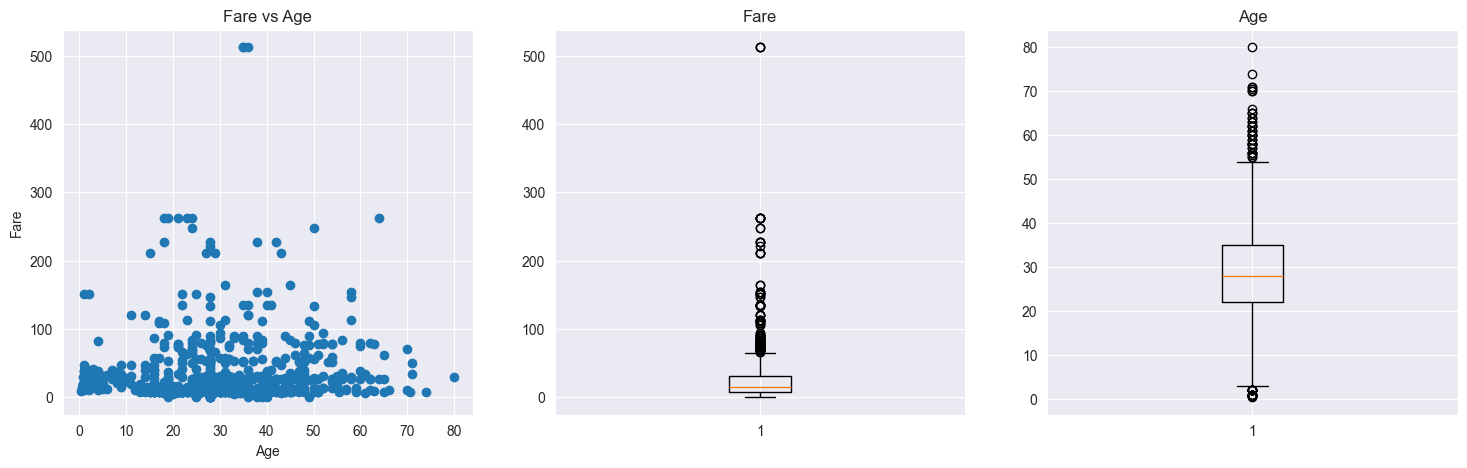

In [14]:
fig, axes = plt.subplots(1,3, figsize=(18,5))

# Fare vs Age
axes[0].scatter(df["Age"], df["Fare"])
axes[0].set_title("Fare vs Age")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Fare")

# Fare Boxplot
axes[1].boxplot(df["Fare"])
axes[1].set_title("Fare")

# Age Boxplot
axes[2].boxplot(df["Age"])
axes[2].set_title("Age")

plt.show()

#### IQR Method (fare)

In [15]:
q1 = df["Fare"].quantile(0.25)
q3 = df["Fare"].quantile(0.75)
iqr = q3 - q1

low = q1 - 1.5 * iqr
high = q3 + 1.5 * iqr

df = df.loc[(df["Fare"] > low) & (df["Fare"] < high)].reset_index(drop=True)

#### IQR Method (age)

In [16]:
q1 = df["Age"].quantile(0.25)
q3 = df["Age"].quantile(0.75)
iqr = q3 - q1

low = q1 - 1.5 * iqr
high = q3 + 1.5 * iqr

df = df.loc[(df["Age"] > low) & (df["Age"] < high)].reset_index(drop=True)

##### Plots after removing outliers

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(18,5))

# Fare vs Age
axes[0].scatter(df["age"], df["fare"])
axes[0].set_title("Fare vs Age")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Fare")

# Fare Boxplot
axes[1].boxplot(df["fare"])
axes[1].set_title("Fare")

# Age Boxplot
axes[2].boxplot(df["age"])
axes[2].set_title("Age")

plt.show()


#### Column Equivalence

In [ ]:
print(df["embarked"].unique(), df["embark_town"].unique())
df[["embarked", "embark_town"]].sample(5)

In [ ]:
print(df["pclass"].unique(), df["class"].unique())
df[["pclass", "class"]].sample(5)

In [ ]:
print(df["sibsp"].unique(), df["parch"].unique())
df[["sibsp", "parch"]].sample(5)

In [ ]:
print(df["survived"].unique(), df["alive"].unique())
df[["survived", "alive"]].sample(5)

#### Drop Features


In [ ]:
# Dropping alone and adult_male because we can get same information from parch and who respectively
# deck contains high amount of missing values,
# embarked == embark_town, pclass == class, alive == survived
df.drop(columns = ["alone","deck","embarked", "adult_male", "class", "alive"], inplace=True)

#### Converting data types

In [ ]:
# category
df[["embark_town", "sex", "who"]] = df[["embark_town", "sex", "who"]].astype("category")

# uint8
df[["pclass", "sibsp", "age", "parch", "survived"]] = df[["pclass", "sibsp", "age", "parch", "survived"]].astype("uint8")

# unit16
df[["fare"]] = df[["fare"]].astype("uint16")

### Exploratory Data Analysis

#### Collinearity

In [ ]:
corr = df.select_dtypes("number").drop(columns=["survived"]).corr()
sns.heatmap(corr, annot=True)

In [ ]:
df.info()

#### Data visualization

##### Survivors by Passenger Type

In [ ]:
survivors_count = df[df["survived"] == True].groupby("who")["survived"].count()
non_survivors_count = df[df["survived"] == False].groupby("who")["survived"].count()

combined_counts = pd.DataFrame({
    "Survivors": survivors_count,
    "Non-Survivors": non_survivors_count
})

combined_counts.plot(kind='bar')
plt.title("Survivors and Non-Survivors by Passenger Type")
plt.xlabel("Passenger Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()
print(combined_counts)

##### Survivors & Non-Survivor by Embark Town


In [ ]:
total_count = df["embark_town"].value_counts()
survived_count = df[df["survived"] == 1]["embark_town"].value_counts()
non_survivors_count = df[df["survived"] == 0]["embark_town"].value_counts()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot total distribution
total_count.plot(kind="bar", ax=axes[0], color="skyblue", title="Embark Town Distribution")
axes[0].set_xlabel("Embark Town")
axes[0].set_ylabel("Count")
axes[0].set_xticks(range(len(total_count.index)))
axes[0].set_xticklabels(total_count.index, rotation=0)

# Plot survivors distribution
survived_count.plot(kind="bar", ax=axes[1], color="green", title="Survivors from Embark Town")
axes[1].set_xlabel("Embark Town")
axes[1].set_ylabel("Count")
axes[1].set_xticks(range(len(total_count.index)))
axes[1].set_xticklabels(total_count.index, rotation=0)

# Plot non-survivors distribution
non_survivors_count.plot(kind="bar", ax=axes[2], color="red", title="Non-Survivors from Embark Town")
axes[2].set_xlabel("Embark Town")
axes[2].set_ylabel("Count")
axes[2].set_xticks(range(len(total_count.index)))
axes[2].set_xticklabels(total_count.index, rotation=0)

plt.show()

### Feature Engineering

#### Family Size

In [ ]:
df["family_size"] = df["sibsp"] + df["parch"] + 1
plt.hist(df["family_size"])
plt.xlabel("Family Size")
plt.ylim(0, 500)
plt.ylabel("Count")
plt.title("Family Size Distribution")
plt.show()

### Predictive Modeling

#### Features & Target Selection

In [ ]:
features = df[["age", "pclass", "fare", "sex", "who", "embark_town", "family_size"]]

In [ ]:
target = df["survived"]

#### Model Selection

In [ ]:
models = {
    "Logistic Regression": make_pipeline(OneHotEncoder(), SimpleImputer(), LogisticRegression()),
    "Random Forest": make_pipeline(OneHotEncoder(), SimpleImputer(), RandomForestClassifier()),
    "Support Vector Machine": make_pipeline(OneHotEncoder(), SimpleImputer(), SVC(kernel="linear")),
    "Naive Bayes": make_pipeline(OneHotEncoder(), SimpleImputer(), GaussianNB()),
}

#### Train & Test data splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

#### Training/Testing and Result

In [ ]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1
    }

#### Model Metrics

In [ ]:
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  Accuracy = {metrics['Accuracy'] * 100:.2f}%")
    print(f"  Precision = {metrics['Precision'] * 100:.2f}%")
    print(f"  Recall = {metrics['Recall'] * 100:.2f}%")
    print(f"  F1 Score = {metrics['F1'] * 100:.2f}%")


#### Comparing model accuracy

In [ ]:
model_names = list(results.keys())
accuracies = [metrics["Accuracy"] for metrics in results.values()]
precisions = [metrics["Precision"] for metrics in results.values()]
recalls = [metrics["Recall"] for metrics in results.values()]
f1_scores = [metrics["F1"] for metrics in results.values()]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot accuracy
axes[0, 0].bar(model_names, accuracies, width=0.5, align="center")
axes[0, 0].set_title("Accuracy Comparison")
axes[0, 0].set_ylabel("Accuracy")
axes[0, 0].set_ylim(0, 1)
axes[0, 0].tick_params(axis="x", labelrotation=45)

# Plot precision
axes[0, 1].bar(model_names, precisions, width=0.5, align="center")
axes[0, 1].set_title("Precision")
axes[0, 1].set_ylabel("Precision")
axes[0, 1].set_ylim(0, 1)
axes[0, 1].tick_params(axis="x", labelrotation=45)

# Plot recall
axes[1, 0].bar(model_names, recalls, width=0.5, align="center")
axes[1, 0].set_title("Recall")
axes[1, 0].set_ylabel("Recall")
axes[1, 0].set_ylim(0, 1)
axes[1, 0].tick_params(axis="x", labelrotation=45)

# Plot F1 score
axes[1, 1].bar(model_names, f1_scores, width=0.5, align="center")
axes[1, 1].set_title("F1 Score")
axes[1, 1].set_ylabel("F1 Score")
axes[1, 1].set_ylim(0, 1)
axes[1, 1].tick_params(axis="x", labelrotation=45)

plt.tight_layout()
plt.show()
